# Forecasting retail sales using xgboost




- Our goal is to forecast weekly sales from a particular department based on historical data.
- This dataset contains weekly sales from 99 departments belonging to 45 different stores.
- The data contains holidays and promotional markdowns offered by various stores and several departments throughout the year.
- The data consists of three sheets: 
    - Stores
    - Features
    - Sales

IMPORT LIBRARIES

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [17]:
# import the csv files using pandas 
feature = pd.read_csv('Features_data_set.csv')
sales = pd.read_csv('sales_data_set.csv')
stores = pd.read_csv('stores_data_set.csv')

In [18]:
# "stores" contains type and size of store related to the 45 stores.

stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [19]:
# Features dataframe contains additional data related to the store, 
#department, and regional activity for the given dates(Weekly)

feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [20]:
# "Sales" dataframe contains historical sales data, which covers 2010-02-05 to 2012-11-01. 
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [21]:
# Change date to standard data type
feature['Date'] = pd.to_datetime(feature['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [22]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [23]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


MERGE DATASET INTO ONE DATAFRAME

In [24]:
df = pd.merge(sales, feature, on = ['Store','Date','IsHoliday'])


In [25]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [26]:
df = pd.merge(df, stores, on = ['Store'], how = 'left') #left join

In [27]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [28]:
x = df['Date']
def get_month(x):
    return int(str(x).split('-')[1])

In [29]:
df['month'] = df['Date'].apply(get_month)

In [30]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10


EXPLORE MERGED DATASET

In [31]:
df.duplicated().any()

False

In [32]:
df.isnull().any()


Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
Temperature     False
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4        True
MarkDown5        True
CPI             False
Unemployment    False
Type            False
Size            False
month           False
dtype: bool

In [33]:
# Fill up NaN elements with zeros
df = df.fillna(0)
df.isnull().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
Temperature     False
Fuel_Price      False
MarkDown1       False
MarkDown2       False
MarkDown3       False
MarkDown4       False
MarkDown5       False
CPI             False
Unemployment    False
Type            False
Size            False
month           False
dtype: bool

# DATA ANALYSIS

In [34]:
# Create pivot tables to understand the relationship in the data
pivot_1 = pd.pivot_table(df, values = 'Weekly_Sales', columns = ['Type'], index = ['Date', 'Store', 'Dept'],
                    aggfunc= np.mean)
pivot_1

Type                          A         B   C
Date       Store Dept                        
2010-01-10 1     1     20094.19       NaN NaN
                 2     45829.02       NaN NaN
                 3      9775.17       NaN NaN
                 4     34912.45       NaN NaN
                 5     23381.38       NaN NaN
...                         ...       ...  ..
2012-12-10 45    93         NaN   2644.24 NaN
                 94         NaN   4041.28 NaN
                 95         NaN  49334.77 NaN
                 97         NaN   6463.32 NaN
                 98         NaN   1061.02 NaN

[421570 rows x 3 columns]

In [35]:
pivot_2 = pd.pivot_table(df, values = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], columns = ['IsHoliday'], index = ['Date', 'Store','Dept'],
                    aggfunc={'MarkDown1' : np.mean,'MarkDown2' : np.mean, 'MarkDown3' : np.mean, 'MarkDown4' : np.mean, 'MarkDown5' : np.mean})
pivot_2

MarkDown1      MarkDown2      MarkDown3      MarkDown4  \
IsHoliday                 False True     False True     False True     False   
Date       Store Dept                                                          
2010-01-10 1     1         0.00  NaN       0.0  NaN      0.00  NaN      0.00   
                 2         0.00  NaN       0.0  NaN      0.00  NaN      0.00   
                 3         0.00  NaN       0.0  NaN      0.00  NaN      0.00   
                 4         0.00  NaN       0.0  NaN      0.00  NaN      0.00   
                 5         0.00  NaN       0.0  NaN      0.00  NaN      0.00   
...                         ...  ...       ...  ...       ...  ...       ...   
2012-12-10 45    93     1956.28  NaN       0.0  NaN      7.89  NaN    599.32   
                 94     1956.28  NaN       0.0  NaN      7.89  NaN    599.32   
                 95     1956.28  NaN       0.0  NaN      7.89  NaN    599.32   
                 97     1956.28  NaN       0.0  NaN      7.89  NaN    599.32   
                 98     1956.28  NaN       0.0  NaN      7.89  NaN    599.32   

                           MarkDown5       
IsHoliday             True     False True  
Date       Store Dept                      
2010-01-10 1     1     NaN      0.00  NaN  
                 2     NaN      0.00  NaN  
                 3     NaN      0.00  NaN  
                 4     NaN      0.00  NaN  
                 5     NaN      0.00  NaN  
...                    ...       ...  ...  
2012-12-10 45    93    NaN   3990.54  NaN  
                 94    NaN   3990.54  NaN  
                 95    NaN   3990.54  NaN  
                 97    NaN   3990.54  NaN  
                 98    NaN   3990.54  NaN  

[421570 rows x 10 columns]

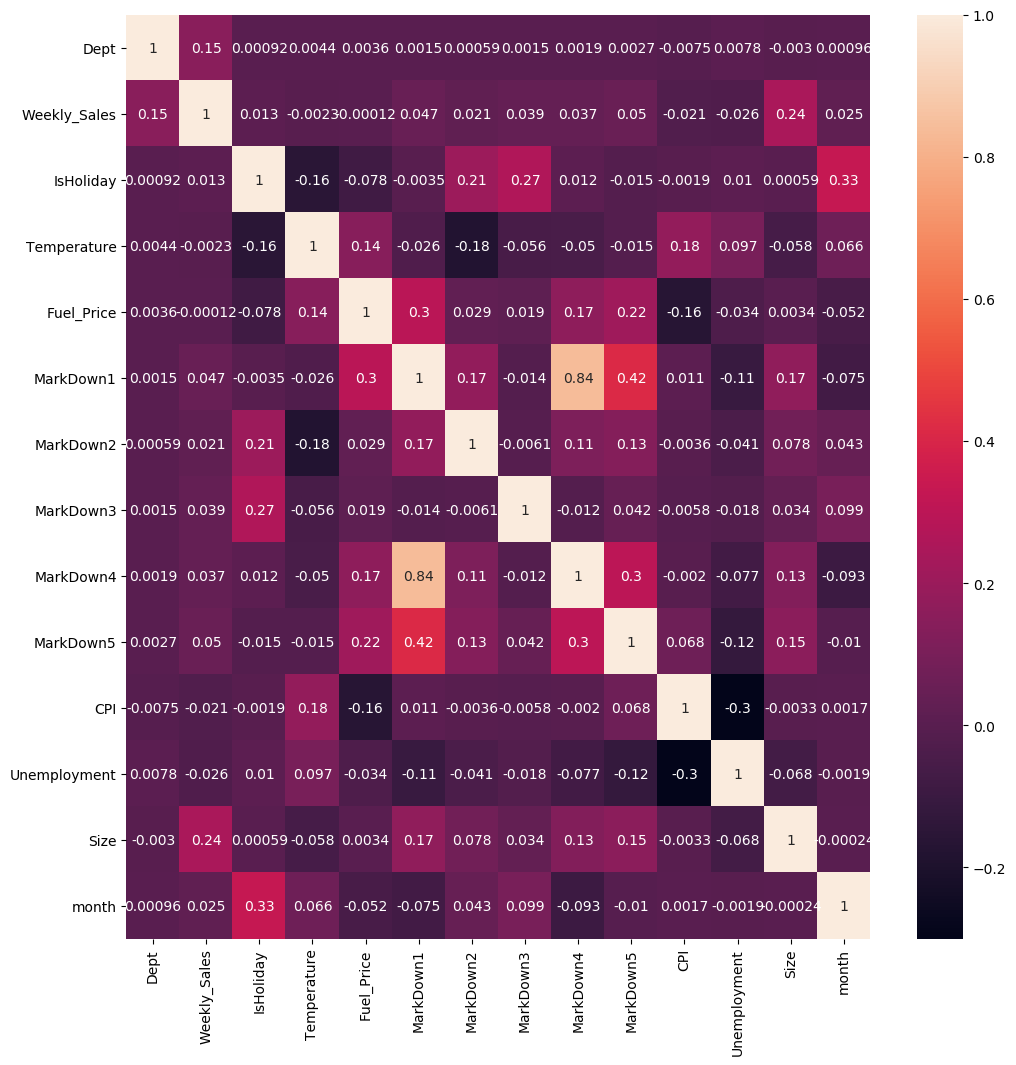

In [36]:
plt.figure(figsize = (12,12))
sns.heatmap(df.drop(columns = ['Store']).corr(), annot = True)
plt.show()

# TASK #8: PREPARE THE DATA BEFORE TRAINING

In [40]:
# Drop the date
df_target_y = df['Weekly_Sales']
df_features = df.drop(columns = ['Weekly_Sales', 'Date'])

In [41]:
df_features = pd.get_dummies(df_features, columns = ['Type', 'Store', 'Dept'], drop_first = True)

In [42]:
df_features.shape

(421570, 138)

In [43]:
df_target_y.shape

(421570,)

In [44]:
X = np.array(df_features).astype('float32')
y = np.array(df_target_y).astype('float32')

In [45]:
# reshaping the array from (421570,) to (421570, 1)
y = y.reshape(-1,1)
y.shape

(421570, 1)

In [46]:
# spliting the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

#  TRAIN THE MODEL BY XGBOOST

In [47]:
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [48]:
import xgboost as xgb
xg_boost_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 10, n_estimators = 100)
xg_boost_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [49]:
# prediction
y_predict = xg_boost_reg.predict(X_test)
Accuracy = xg_boost_reg.score(X_test, y_test)
print("Accuracy : {}".format(Accuracy))

Accuracy : 0.9020304932771482


In [50]:
from sklearn.metrics import r2_score, mean_squared_error
MSE = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('MSE =',MSE,'\nR2 =', r2) 

MSE = 50354984.0 
R2 = 0.9020304932771482


# TRAIN XGBOOST USING SAGEMAKER

In [51]:
#in xgboost training first column should be the target column
train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]
train_data.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


,Target,0,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,12956.889648,0.0,74.639999,3.683,0.000000,0.000000,0.000000,0.000000,0.00000,129.049026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45079.539062,0.0,76.580002,3.618,0.000000,0.000000,0.000000,0.000000,0.00000,129.043198,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2824.020020,0.0,59.770000,3.828,0.000000,0.000000,0.000000,0.000000,0.00000,129.805191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10570.910156,0.0,75.199997,3.827,0.000000,0.000000,0.000000,0.000000,0.00000,139.700638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3356.929932,0.0,23.780001,2.882,0.000000,0.000000,0.000000,0.000000,0.00000,191.368378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13155.549805,0.0,69.309998,2.899,0.000000,0.000000,0.000000,0.000000,0.00000,204.140656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,25611.830078,0.0,71.790001,3.915,5320.709961,42.200001,204.429993,883.539978,2374.73999,138.113800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5455.529785,0.0,69.059998,2.699,0.000000,0.000000,0.000000,0.000000,0.00000,189.612549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,21027.179688,0.0,36.610001,3.767,0.000000,0.000000,0.000000,0.000000,0.00000,192.826065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,21.360001,0.0,46.400002,2.895,0.000000,0.000000,0.000000,0.000000,0.00000,132.022659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
test_data = pd.DataFrame({'Target':y_test[:,0]})
for i in range(X_test.shape[1]):
    test_data[i] = X_test[:,i]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
val_data = pd.DataFrame({'Target':y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,i]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
# save data as csv files.
train_data.to_csv('train.csv', header = False, index = False)
test_data.to_csv('test.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [56]:
import sagemaker
import boto3 #Boto3 is a Software Development Kit (SDK) for Python
from sagemaker import Session
#create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = 'sagemaker--project' 
prefix = 'XGBoost-Regressor'#subfolder in bucket
key = 'XGBoost-Regressor'#subfolder in prefix
role = sagemaker.get_execution_role()

In [57]:
import os
# The data in record-io format to S3 bucket to be accessed later for training
with open('train.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker--project/XGBoost-Regressor/train/XGBoost-Regressor


In [58]:
# The data in record-io format to S3 bucket to be accessed later for testing
with open('test.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(f)
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded test data location: {}'.format(s3_test_data))

uploaded test data location: s3://sagemaker--project/XGBoost-Regressor/test/XGBoost-Regressor


In [59]:
# The data in record-io format to S3 bucket to be accessed later for validation
with open('validation.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

uploaded validation data location: s3://sagemaker--project/XGBoost-Regressor/validation/XGBoost-Regressor


In [60]:
#store the linear learner output
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker--project/XGBoost-Regressor/output


In [61]:
#get the training container of sagemaker built-in algorithms
from sagemaker.amazon.amazon_estimator import get_image_uri
container = get_image_uri(boto3.Session().region_name, 'xgboost','1.7-1') # Latest version of XGboost

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [62]:
#pass in the container, the type of instance,output path
Xgboost_regressor = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.m4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)
# tunned parameters
Xgboost_regressor.set_hyperparameters(max_depth=25,
                           objective='reg:linear',
                           colsample_bytree = 0.3913546819101119,
                           alpha = 1.0994354985124635,
                           eta = 0.23848185159806115,
                           num_round = 237
                           )


train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [64]:
train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')

data_channels = {'train': train_input,'validation': valid_input}
Xgboost_regressor.fit(data_channels)

The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2023-05-03-03-35-51-843


2023-05-03 03:35:52 Starting - Starting the training job...
2023-05-03 03:36:17 Starting - Preparing the instances for training......
2023-05-03 03:37:12 Downloading - Downloading input data...
2023-05-03 03:37:42 Training - Downloading the training image...
2023-05-03 03:38:28 Training - Training image download completed. Training in progress...[2023-05-03 03:38:38.622 ip-10-0-81-209.ca-central-1.compute.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-05-03 03:38:38.701 ip-10-0-81-209.ca-central-1.compute.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2023-05-03:03:38:39:INFO] Imported framework sagemaker_xgboost_container.training
[2023-05-03:03:38:39:INFO] Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
[2023-05-03:03:38:39:INFO] No GPUs detected (normal if no gpus installed)
[2023-05-03:03:38:39:INFO] Running XGBoost Sagemaker in algorithm mode
[2023-05-03:03:38:39:INFO] Determined 0 G

DEPLOY THE MODEL 

In [ ]:
Xgboost_regressor = Xgboost_regressor.deploy(initial_instance_count = 1, instance_type = 'ml.m5.2xlarge')

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2023-05-03-03-49-53-728
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2023-05-03-03-49-53-728
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2023-05-03-03-49-53-728


---

In [ ]:
from sagemaker.predictor import csv_serializer, json_deserializer
# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.
Xgboost_regressor.serializer = csv_serializer

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
MSE = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('MSE =',MSE,'\nR2 =', r2) 

In [ ]:
# Delete the end-point
Xgboost_regressor.delete_endpoint()